<a href="https://colab.research.google.com/github/Wrenfrncis/mcdonalds_analysis/blob/main/pythn_proj_mcdnlds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***ex proj mcdnalds***

In [ ]:
!pip install --force-reinstall ibm_db==3.1.0 ibm_db_sa==0.3.3
# Ensure we don't load_ext with sqlalchemy>=1.4 (incompadible)
!pip uninstall sqlalchemy==1.4 -y && pip install sqlalchemy==1.3.24
!pip install ipython-sql
import ibm_db
#Replace the placeholder values with your actual Db2 hostname, username, and password:
dsn_hostname = "3883e7e4-18f5-4afe-be8c-fa31c41761d2.bs2io90l08kqb1od8lcg.databases.appdomain.cloud" # e.g.: "54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud"
dsn_uid = "sgz87027"        # e.g. "abc12345"
dsn_pwd = "WYwIHuGn4lm6uxN1"      # e.g. "7dBZ3wWt9XN6$o0J"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "bludb"            # e.g. "BLUDB"
dsn_port = "31498"                # e.g. "32733" 
dsn_protocol = "TCPIP"            # i.e. "TCPIP"
dsn_security = "SSL"              #i.e. "SSL"

#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create the dsn connection string
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};"
    "SECURITY={7};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd,dsn_security)

#print the connection string to check correct values are specified
print(dsn)

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )

#Retrieve Metadata for the Database Server
server = ibm_db.server_info(conn)

print ("DBMS_NAME: ", server.DBMS_NAME)
print ("DBMS_VER:  ", server.DBMS_VER)
print ("DB_NAME:   ", server.DB_NAME)

#Retrieve Metadata for the Database Client / Driver
client = ibm_db.client_info(conn)

print ("DRIVER_NAME:          ", client.DRIVER_NAME) 
print ("DRIVER_VER:           ", client.DRIVER_VER)
print ("DATA_SOURCE_NAME:     ", client.DATA_SOURCE_NAME)
print ("DRIVER_ODBC_VER:      ", client.DRIVER_ODBC_VER)
print ("ODBC_VER:             ", client.ODBC_VER)
print ("ODBC_SQL_CONFORMANCE: ", client.ODBC_SQL_CONFORMANCE)
print ("APPL_CODEPAGE:        ", client.APPL_CODEPAGE)
print ("CONN_CODEPAGE:        ", client.CONN_CODEPAGE)

# ibm_db.close(conn)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.3/797.3 KB 13.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 618.5/618.5 KB 32.9 MB/s eta 0:00:00
  Created wheel for ibm_db: filename=ibm_db-3.1.0-cp38-cp38-linux_x86_64.whl size=41725279 sha256=67a009a9e31b5006dd712f1dc6ca3ed8c2bc924c843c3dacb6aa804d510e7a03
  Stored in directory: /root/.cache/pip/wheels/43/71/0a/3065745bc1dc4cafbdcb09e2557082609f7689b16108b670df
  Created wheel for ibm_db_sa: filename=ibm_db_sa-0.3.3-py3-none-any.whl size=27427 sha256=884d72cbec3ea672372785c910a9233d65f647481e033db7408664a046228673
  Stored in dir

In [ ]:
stmt=ibm_db.exec_immediate(conn,"SELECT count(*) from MCDONALDS")
ibm_db.fetch_both(stmt)

{'1': 260, 0: 260}

In [ ]:
import pandas
import ibm_db_dbi
pconn=ibm_db_dbi.Connection(conn)
df=pandas.read_sql('SELECT * FROM MCDONALDS',pconn)
df.head()

,CATEGORY,ITEM,SERVING_SIZE,CALORIES,CALORIES_FROM_FAT,TOTAL_FAT,TOTAL_FAT____DAILY_VALUE_,SATURATED_FAT,SATURATED_FAT____DAILY_VALUE_,TRANS_FAT,...,CARBOHYDRATES,CARBOHYDRATES____DAILY_VALUE_,DIETARY_FIBER,DIETARY_FIBER____DAILY_VALUE_,SUGARS,PROTEIN,VITAMIN_A____DAILY_VALUE_,VITAMIN_C____DAILY_VALUE_,CALCIUM____DAILY_VALUE_,IRON____DAILY_VALUE_
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [ ]:
df.describe(include='all')

,CATEGORY,ITEM,SERVING_SIZE,CALORIES,CALORIES_FROM_FAT,TOTAL_FAT,TOTAL_FAT____DAILY_VALUE_,SATURATED_FAT,SATURATED_FAT____DAILY_VALUE_,TRANS_FAT,...,CARBOHYDRATES,CARBOHYDRATES____DAILY_VALUE_,DIETARY_FIBER,DIETARY_FIBER____DAILY_VALUE_,SUGARS,PROTEIN,VITAMIN_A____DAILY_VALUE_,VITAMIN_C____DAILY_VALUE_,CALCIUM____DAILY_VALUE_,IRON____DAILY_VALUE_
count,260,260,260,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
unique,9,260,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Coffee & Tea,Egg McMuffin,16 fl oz cup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,95,1,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,NaN,NaN,NaN,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,NaN,NaN,NaN,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,NaN,NaN,NaN,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 63.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 32.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


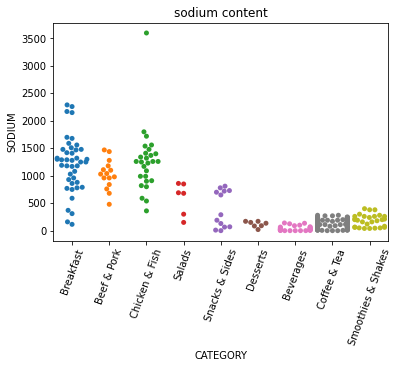

In [ ]:
from ast import increment_lineno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plot =sns.swarmplot(x="CATEGORY",y='SODIUM',data=df)
plt.setp(plot.get_xticklabels(),rotation=70)
plt.title('sodium content')
plt.show()

In [ ]:
df['SODIUM'].describe()

count     260.000000
mean      495.750000
std       577.026323
min         0.000000
25%       107.500000
50%       190.000000
75%       865.000000
max      3600.000000
Name: SODIUM, dtype: float64

In [ ]:
# where maximum value is obtained
df['SODIUM'].idxmax()

82

In [ ]:
df.at[82,'ITEM']

'Chicken McNuggets (40 piece)'

# ***scatterplot*** used to show relation between two variable

AttributeError: ignored

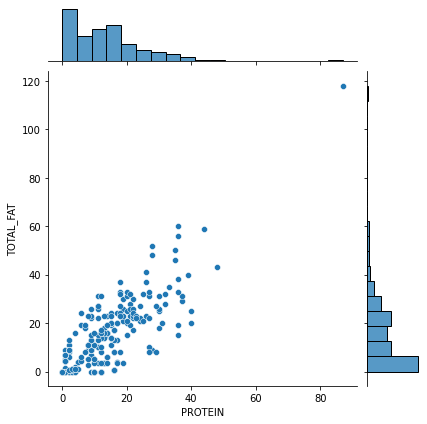

In [ ]:
_plot=sns.jointplot(x="PROTEIN",y="TOTAL_FAT",data=df)
plot.show()